# 3623. Count Number of Trapezoids I

You are given a 2D integer array points, where points[i] = [xi, yi] represents the coordinates of the ith point on the Cartesian plane.

A horizontal trapezoid is a convex quadrilateral with at least one pair of horizontal sides (i.e. parallel to the x-axis). Two lines are parallel if and only if they have the same slope.

Return the number of unique horizontal trapezoids that can be formed by choosing any four distinct points from points.

Since the answer may be very large, return it modulo 109 + 7.

 

Example 1:

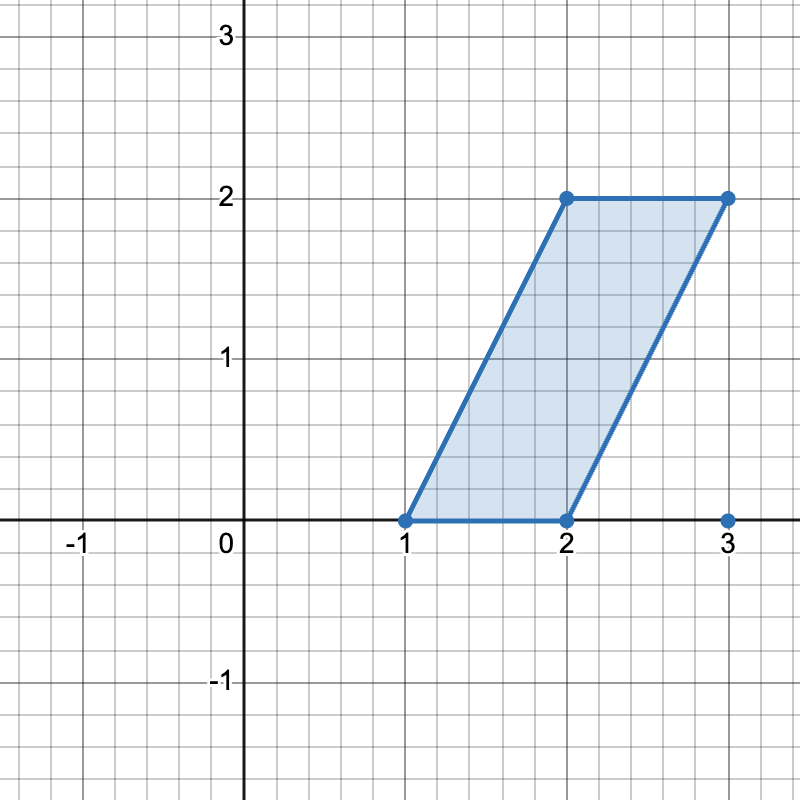
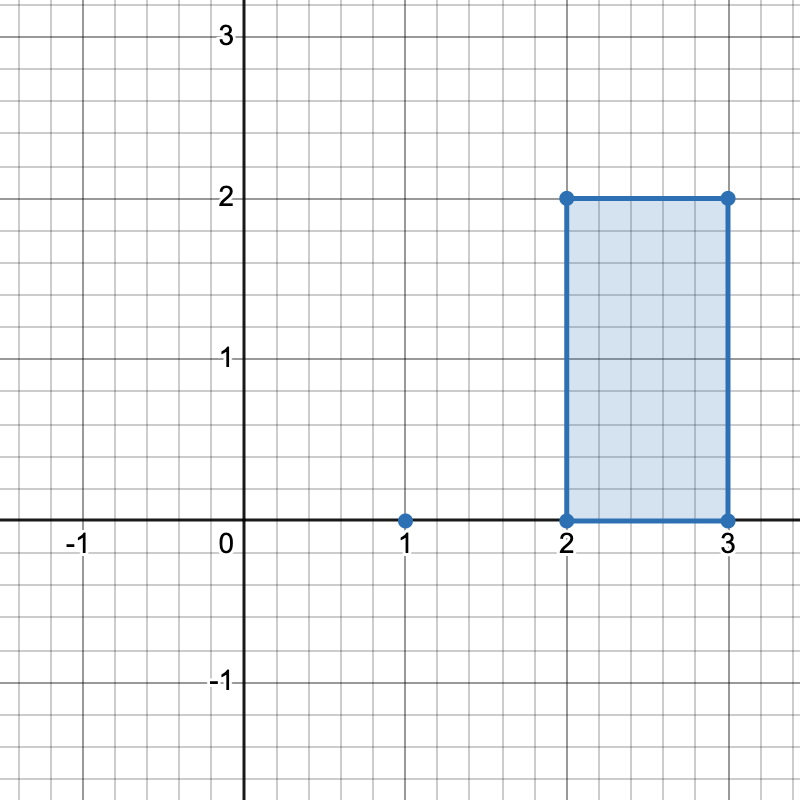
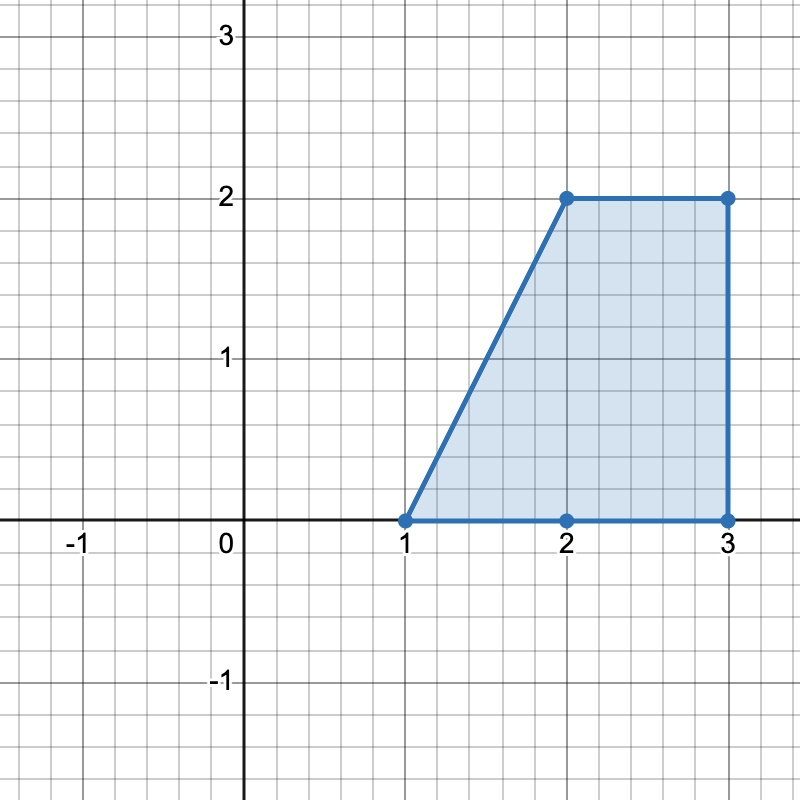

Input: points = [[1,0],[2,0],[3,0],[2,2],[3,2]]

Output: 3

Explanation:



There are three distinct ways to pick four points that form a horizontal trapezoid:

Using points [1,0], [2,0], [3,2], and [2,2].
Using points [2,0], [3,0], [3,2], and [2,2].
Using points [1,0], [3,0], [3,2], and [2,2].
Example 2:

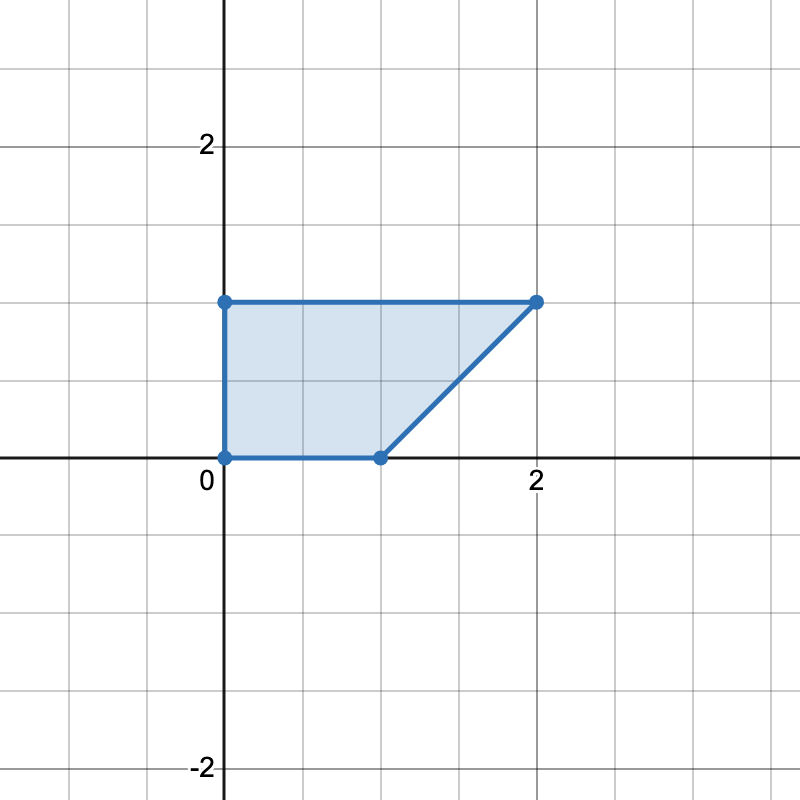

Input: points = [[0,0],[1,0],[0,1],[2,1]]

Output: 1

Explanation:



There is only one horizontal trapezoid that can be formed.

 

Constraints:

4 <= points.length <= 105
–108 <= xi, yi <= 108
All points are pairwise distinct.a

## Solution:

Combinatorics: Between any 2 set of points on different horizontal levels, no. of trapezoids possible is mc2*nC2, where m and n are the no. of points in level 1 and level 2. Similarly we have to add this quantity for each pair of levels.

In [ ]:
points = [[-73,-72],[-1,-56],[-92,30],[-57,-89],[-19,-89],[-35,30],[64,-72]]
MOD=10**9+7
#sort by y coordinate
points.sort(key=lambda x:x[1])
#Create a hashmap, keeping track of the no. of points at a particular level
mpp={}
for x,y in points:
    mpp[y]=1 if y not in mpp else mpp[y]+1
#Convert into array keeping track of nC2 where n is the no. of points at a particular level to use prefix sum
arr=[]
for key,value in mpp.items():
    if value>=2:
        arr.append(value*(value-1)//2)
prefix=[arr[0]]*len(arr)
for i in range(1,len(arr)):
    prefix[i]=prefix[i-1]+arr[i]
#Now use the prefix array to efficiently calculate the sumproduct between any two pairs
res=0
for i in range(len(prefix)-1):
    res+=(arr[i]*(prefix[-1]-prefix[i]))%MOD
res%MOD      

3

In [16]:
mpp

{-89: 2, -72: 2, -56: 1, 30: 2}

In [17]:
arr

[1, 1, 1]

In [18]:
prefix

[1, 2, 3]